In [21]:
import pandas as pd
df = pd.read_csv("cs_articles.csv", sep = ",", header = 0)

##Wordcloud for each year

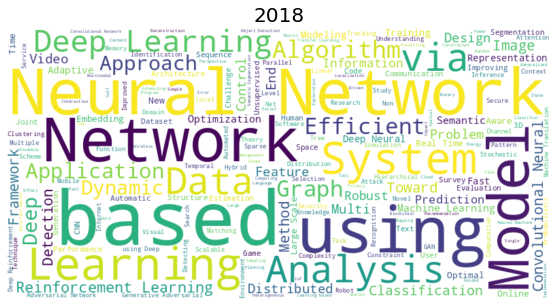

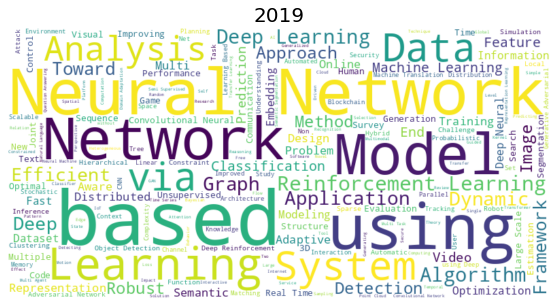

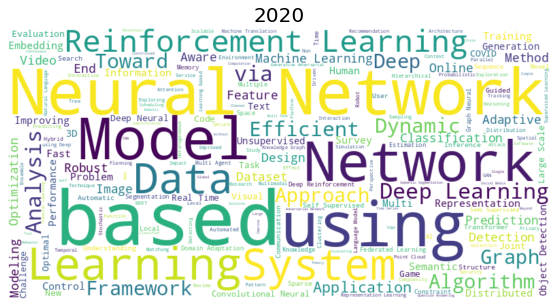

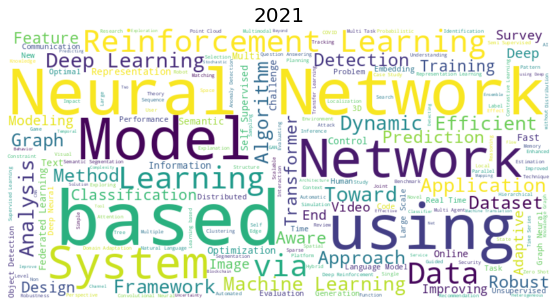

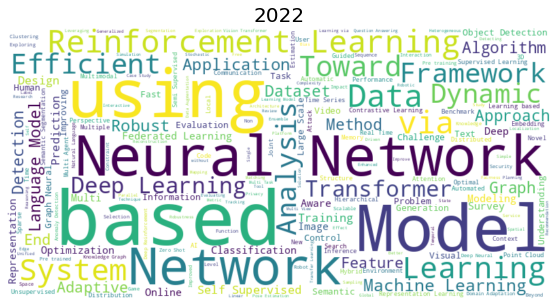

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

%matplotlib inline

def generate_wordcloud(year, titles):
    words = ' '.join(titles)
    wordcloud = WordCloud(
        width=800,
        height=400,
        random_state=21,
        max_font_size=110,
        background_color='white'
    ).generate(words)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(f'{year}', fontsize=20)
    plt.show()

for year in df['year'].unique():
    year_titles = df[df['year'] == year]['title'].tolist()
    generate_wordcloud(year, year_titles)

In [23]:
import string

def process_title(title):
    # Create a translation table that replaces all punctuation except hyphen with a space
    translation_table = str.maketrans(
        {char: ' ' if char not in '-' else char for char in string.punctuation}
    )

    # Replace punctuation in the title with a space, except for hyphen
    title_processed = title.translate(translation_table)

    # Remove multiple spaces from the title
    title_processed = ' '.join(title_processed.split())

    return title_processed

df['title_processed'] = df['title'].apply(process_title)

##Finding Abbreviations

In [24]:
def find_abbreviations(text):
    words = text.split()
    result = []

    for word in words:
        if len(word) > 2 and word.isupper():
            result.append(word)

    return ", ".join(result)

df["title_abbreviations"] = df["title_processed"].apply(find_abbreviations)
df.head(10)

,Unnamed: 0,ID,title,categories,year,title_processed,title_abbreviations
0,929308,1801.00377,Help Me Find a Job: A Graph-based Approach for...,cs.IR cs.SI,2018,Help Me Find a Job A Graph-based Approach for ...,
1,929315,1801.00384,Error-Robust Multi-View Clustering,cs.LG,2018,Error-Robust Multi-View Clustering,
2,929316,1801.00385,Interactive Co-Design of Form and Function for...,cs.RO,2018,Interactive Co-Design of Form and Function for...,
3,929318,1801.00387,Diversity Analysis of Millimeter-Wave Massive ...,cs.IT math.IT,2018,Diversity Analysis of Millimeter-Wave Massive ...,MIMO
4,929319,1801.00388,Beyond Word Embeddings: Learning Entity and Co...,cs.CL cs.AI cs.IR cs.SI,2018,Beyond Word Embeddings Learning Entity and Con...,
5,929320,1801.00389,Throughput Enhancement by Concurrent Transmiss...,cs.NI,2018,Throughput Enhancement by Concurrent Transmiss...,WPAN
6,929321,1801.00390,Time Aware Least Recent Used (TLRU) Cache Mana...,cs.NI,2018,Time Aware Least Recent Used TLRU Cache Manage...,"TLRU, ICN"
7,929324,1801.00393,Theoretical Analysis of Sparse Subspace Cluste...,cs.LG stat.ML,2018,Theoretical Analysis of Sparse Subspace Cluste...,
8,929325,1801.00394,Generalized Compression Strategy for the Downl...,cs.IT math.IT,2018,Generalized Compression Strategy for the Downl...,
9,929329,1801.00398,Scalable Hash-Based Estimation of Divergence M...,cs.IT math.IT,2018,Scalable Hash-Based Estimation of Divergence M...,


In [25]:
abbs = [
    word
    for row in df['title_abbreviations']
    for word in row.split(", ")
]

abbs_freq = pd.Series(abbs).value_counts()
top_200_abbs = abbs_freq.head(200)

abbs_list = " ".join(top_200_abbs.index)
abbs_list = abbs_list.lstrip(" ")

print(abbs_list)

COVID-19 MIMO BERT CNN GAN UAV NLP SLAM GPU LSTM DNN NOMA RGB-D MRI ASR SGD EEG RGB FPGA HPC API CSI RNN D2D IEEE R-CNN SAT LDPC DNA MDS MPC SDN PAC MISO XAI URLLC VAE SAR OFDM CPU PCA MAC SVM MPI CLIP DNS GNN ECG CAD NER SQL VQA OCR SWIPT TTS RDF V2X DRAM RISC-V NAS TSP ADMM ODE GDPR LEO GPS 3-D MEC JPEG AMR LTE NMT HOL MU-MIMO P2P TCP MLP ROS DAG CTR IMU RIS RGBD BFT LTL FPT MCMC EHR FDD ASP HCI PDE RAN SPARQL GNSS ARM TLS COVID OTFS MDP LCD ICT GPT-3 NLU IRS SMT AUC SGX GUI NLG HTTP YOLO CUDA HDR III BCI CTC NLI FAIR QUIC OCT CPS ICU LIDAR MAP NFV 2-D SVD GCN VLC V2V MMSE OOD CSIT MIMO-NOMA RRT POMDP CAN CSP HRI 3GPP POI O-RAN FSO CMOS ALOHA HARQ DETR TREC UWB VLSI MIMO-OFDM GPT-2 AGI OFDMA ISO ICD E2E 2D-3D SIMD PDF SHAP PUF CRF ACL2 PTAS BLE LDA SIR RFID REST LIME C-V2X DRL GRU SNR AMP C-RAN B5G OSS IDS MCTS MOOC URL WMT POS NVM JSON SRAM VANET TDD CFD NVIDIA PSO DSL SIC PID AWGN APN


In [26]:
# Create a dictionary to replace abbreviations in the 'title_lem' column
word_replacements = {}
with open('word_replacements.txt') as file:
    for line in file:
        key, value = line.strip().split(':', 1)
        word_replacements[key] = value

# Replace abbreviations in the 'title_processed' column
def replace_words(text):
    return ' '.join([word_replacements.get(word, word) for word in text.split()])

df['title_processed'] = df['title_processed'].apply(replace_words)


##Data Preprocessing

In [27]:
df['title_processed'] = df['title_processed'].str.lower().apply(process_title)

##Stopwords Removing

In [28]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [29]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

# Get a set of stop words from the NLTK library
stop_words = set(stopwords.words('english'))

# Add custom stop words to the set
custom_stop_words = [
    '2022', '2021', '2020', '2019', '2018', 'driving', 'driven', 'via', 'based',
    'trec', 'wmt', 'iwslt', 'ntire', 'isic', 'aaai', 'wnut', 'ieee', 'using',
    'toward', 'towards', 'a', 'an', "throughput", "beyond"
]
stop_words.update(custom_stop_words)

def remove_stop_words(text, stop_words):
    return ' '.join([word for word in text.split() if word not in stop_words])

# Remove stop words from the 'title_processed' column
df['title_processed'] = df['title_processed'].apply(
    lambda x: remove_stop_words(x, stop_words)
)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tapetrova/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##Lemmatization

In [30]:
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('omw-1.4')

# Create a WordNetLemmatizer object
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text, lemmatizer):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

# Perform lemmatization on the 'title_processed' column and store it in the 'title_lem' column
df['title_lem'] = df['title_processed'].apply(
    lambda x: lemmatize_text(x, lemmatizer)
)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tapetrova/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/tapetrova/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


##Trigrams Finding

In [31]:
def get_trigrams(text):
    words = text.split()
    trigrams = [
        f"{words[i]} {words[i + 1]} {words[i + 2]}"
        for i in range(len(words) - 2)
        if len(words) >= 2
    ]
    return trigrams

df['trigrams'] = df['title_lem'].apply(get_trigrams)

In [32]:
df.head()

,Unnamed: 0,ID,title,categories,year,title_processed,title_abbreviations,title_lem,trigrams
0,929308,1801.00377,Help Me Find a Job: A Graph-based Approach for...,cs.IR cs.SI,2018,help find job graph-based approach job recomme...,,help find job graph-based approach job recomme...,"[help find job, find job graph-based, job grap..."
1,929315,1801.00384,Error-Robust Multi-View Clustering,cs.LG,2018,error-robust multi-view clustering,,error-robust multi-view clustering,[error-robust multi-view clustering]
2,929316,1801.00385,Interactive Co-Design of Form and Function for...,cs.RO,2018,interactive co-design form function legged rob...,,interactive co-design form function legged rob...,"[interactive co-design form, co-design form fu..."
3,929318,1801.00387,Diversity Analysis of Millimeter-Wave Massive ...,cs.IT math.IT,2018,diversity analysis millimeter-wave massive mul...,MIMO,diversity analysis millimeter-wave massive mul...,"[diversity analysis millimeter-wave, analysis ..."
4,929319,1801.00388,Beyond Word Embeddings: Learning Entity and Co...,cs.CL cs.AI cs.IR cs.SI,2018,word embeddings learning entity concept repres...,,word embeddings learning entity concept repres...,"[word embeddings learning, embeddings learning..."


##Frequency Table

In [33]:
from collections import Counter

# Filter data for year 2022
df_2022 = df[df['year'] == 2022]

# Get the 100 most common trigrams for 2022
trigram_list = [
    trigram
    for trigrams in df_2022['trigrams']
    for trigram in trigrams
]

trigram_counter = Counter(trigram_list)
top_trigrams = trigram_counter.most_common(1100)

# Create a table with top trigrams 2022 as left column and relative frequencies of these trigrams as column headings
table = pd.DataFrame(top_trigrams, columns=['Trigram', 'Frequency'])
table.set_index('Trigram', inplace=True)
table.drop('Frequency', axis=1, inplace=True)

# Fill the table with relative frequencies for each year
years = [2022, 2021, 2020, 2019, 2018]
for year in years:
    year_df = df[df['year'] == year]
    year_trigram_list = [
        trigram
        for trigrams in year_df['trigrams']
        for trigram in trigrams
    ]

    year_trigram_counter = Counter(year_trigram_list)
    total_trigrams = len(year_trigram_list)
    table[year] = 0
    
    for trigram, frequency in year_trigram_counter.items():
        if (
            trigram in table.index
            and frequency > 0
            and not all(word.strip() == '' for word in trigram.split())
        ):
            table.loc[trigram, year] = frequency / total_trigrams

# Drop rows with all zeros
table_freq = table.loc[(table != 0).any(axis=1)]

In [34]:
def compare_trigrams(table):
    # Check if there are at least 2 trigrams to compare
    if len(table) < 2:
        return table

    # Iterate over all pairs of trigrams
    for i in range(len(table)):
        for j in range(i + 1, len(table)):
            trigram_1 = table.index[i]
            trigram_2 = table.index[j]
            same_freq = True

            # Check if the frequency is the same for both trigrams in every year
            for year in table.columns:
                freq_1 = table.loc[trigram_1, year]
                freq_2 = table.loc[trigram_2, year]
                if abs(freq_1 - freq_2) > 0.01 * freq_1:
                    same_freq = False
                    break

            # If the frequencies are the same, combine the trigrams
            if same_freq:
                new_trigram = f"{trigram_1} ({trigram_2.split()[-1]})"
                # Replace the first trigram with the combined trigram
                table = table.rename(index={trigram_1: new_trigram})
                # Delete the row with the second trigram
                table = table.drop(trigram_2)
                # Recursively call the function with the updated table
                return compare_trigrams(table)

    return table

table_freq = compare_trigrams(table_freq)

##Rank Table

In [35]:
import numpy as np

# Create a copy of table_freq to work with
table_copy = table_freq.copy()

# Create a DataFrame to store the ranks
table_rank = pd.DataFrame(columns=years, index=table_copy.index)

# Iterate over the years
for year in years:
    # Get the frequencies for the year
    freqs = table_copy[year]
    
    if year == 2022:
        # Add a small negative value to the frequencies of 2021 to break ties
        tiebreaker = table_copy[2021] * -1e-10
        freqs = freqs + tiebreaker
    
    # Sort the frequencies in descending order
    sorted_freqs = freqs.sort_values(ascending=False)
    
    # Get the rank for each trigram
    ranks = sorted_freqs.rank(ascending=False, method='first')
    
    # Add the ranks to the table_rank DataFrame
    table_rank[year] = ranks

# Convert the ranks to integers
table_rank = table_rank.astype(int)

table_rank = table_rank[table_rank[2022] <= 1000]
table_rank = table_rank.sort_values(by=2022, ascending=True)

In [36]:
table_rank.head(30)

,2022,2021,2020,2019,2018
Trigram,,,,,
graph neural network,1,3,4,9,44
deep neural network,2,2,2,2,2
deep reinforcement learning,3,5,3,4,4
convolutional neural network,4,1,1,1,1
multiple input multiple (output),5,6,7,6,5
generative adversarial network,6,4,5,3,3
natural language processing,7,7,9,15,14
3d object detection,8,19,24,31,142
bidirectional encoder representation (transformer),9,8,6,10,513


In [37]:
table_freq = table_freq[table_freq.index.isin(table_rank.index)]

In [41]:
table_freq.head(30)

,2022,2021,2020,2019,2018
Trigram,,,,,
graph neural network,0.001693,0.001583,0.001234,0.000605,0.000152
deep neural network,0.001225,0.001614,0.001870,0.002236,0.002395
deep reinforcement learning,0.001080,0.001128,0.001255,0.001438,0.001312
convolutional neural network,0.001072,0.001676,0.001995,0.002630,0.004174
multiple input multiple (output),0.000890,0.000963,0.000736,0.000901,0.001219
generative adversarial network,0.000835,0.001137,0.001145,0.001537,0.001654
natural language processing,0.000794,0.000905,0.000629,0.000376,0.000327
3d object detection,0.000494,0.000341,0.000302,0.000224,0.000060
bidirectional encoder representation (transformer),0.000482,0.000796,0.000875,0.000583,0.000011


In [39]:
table_freq.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, graph neural network to 3d object tracking
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2022    1000 non-null   float64
 1   2021    1000 non-null   float64
 2   2020    1000 non-null   float64
 3   2019    1000 non-null   float64
 4   2018    1000 non-null   float64
dtypes: float64(5)
memory usage: 46.9+ KB


In [40]:
table_freq.head(1000).to_csv("trigram_frequency_table.csv", index=True, sep=',')
table_rank.to_csv("trigram_rank_table.csv", index=True, sep=',')